In [2]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

# Constants
EMPTY = 0
PLAYER_X = 1
PLAYER_O = -1
DRAW = 0
GAMMA = 0.5  # Discount factor for DP
EPSILON = 0.1  # Exploration factor for epsilon-greedy
ALPHA = 0.1  # Learning rate
BOARD_SIZE_4x4 = 4
BOARD_SIZE_5x5 = 5

# Initialize board
def create_board(size):
    return np.zeros((size, size), dtype=int)


In [3]:
def check_winner(board):
    size = board.shape[0]
    lines = []

    # Rows and columns
    for i in range(size):
        lines.append(board[i, :])  # Row
        lines.append(board[:, i])  # Column

    # Diagonals
    lines.append(np.diag(board))
    lines.append(np.diag(np.fliplr(board)))

    # Check lines for winner
    for line in lines:
        if np.all(line == PLAYER_X):
            return PLAYER_X
        if np.all(line == PLAYER_O):
            return PLAYER_O

    # Check for a draw
    if np.all(board != EMPTY):
        return DRAW

    return None  # No winner yet



In [4]:
class TicTacToeDPAgent:
    def __init__(self, size):
        self.size = size
        self.state_values = defaultdict(float)  # State value function V(s)
        self.policy = defaultdict(lambda: np.random.choice(size*size))  # Initial random policy

    def state_to_string(self, board):
        """Convert board state to a string for hashable state."""
        return str(board.reshape(self.size * self.size))

    def get_possible_actions(self, board):
        """Get possible actions (empty cells)."""
        return list(zip(*np.where(board == EMPTY)))

    def choose_action(self, board, player):
        """Epsilon-greedy policy to choose the next action."""
        if np.random.rand() < EPSILON:
            # Explore: choose random action
            possible_actions = self.get_possible_actions(board)
            return possible_actions[np.random.choice(len(possible_actions))]
        else:
            # Exploit: choose best action
            best_action = None
            best_value = -np.inf
            for action in self.get_possible_actions(board):
                new_board = board.copy()
                new_board[action] = player
                value = self.state_values[self.state_to_string(new_board)]
                if value > best_value:
                    best_value = value
                    best_action = action
            return best_action

    def update_state_values(self, history, reward):
        """Update state values using the history of the game."""
        for board in reversed(history):
            state = self.state_to_string(board)
            self.state_values[state] += ALPHA * (reward - self.state_values[state])
            reward = self.state_values[state]  # Bootstrapping with V(s)

    def play_game(self, opponent='random'):
        """Simulate a game between the agent and a random player."""
        board = create_board(self.size)
        player = PLAYER_X
        history = []

        while True:
            action = self.choose_action(board, player)
            history.append(board.copy())
            board[action] = player

            winner = check_winner(board)
            if winner is not None:
                if winner == PLAYER_X:
                    reward = 1  # Agent wins
                elif winner == PLAYER_O:
                    reward = -1  # Agent loses
                else:
                    reward = 0  # Draw
                self.update_state_values(history, reward)
                return winner

            # Switch player
            player = -player if opponent == 'random' else opponent

    def train(self, episodes):
        win_count = 0
        win_rates = []

        for episode in range(episodes):
            winner = self.play_game()
            if winner == PLAYER_X:
                win_count += 1

            if (episode + 1) % 100 == 0:
                win_rate = win_count / (episode + 1)
                win_rates.append(win_rate)
                print(f"Episode {episode + 1}: Win rate = {win_rate:.3f}")

        return win_rates

In [5]:
# Plotting win rate
def plot_win_rate(win_rates, board_size):
    plt.plot(win_rates)
    plt.xlabel('Episodes (x100)')
    plt.ylabel('Win Rate')
    plt.title(f'Agent Win Rate Over Time (Board Size: {board_size}x{board_size})')
    plt.show()

Episode 100: Win rate = 0.540
Episode 200: Win rate = 0.535
Episode 300: Win rate = 0.540
Episode 400: Win rate = 0.562
Episode 500: Win rate = 0.588
Episode 600: Win rate = 0.590
Episode 700: Win rate = 0.611
Episode 800: Win rate = 0.629
Episode 900: Win rate = 0.634
Episode 1000: Win rate = 0.643
Episode 1100: Win rate = 0.647
Episode 1200: Win rate = 0.653
Episode 1300: Win rate = 0.660
Episode 1400: Win rate = 0.666
Episode 1500: Win rate = 0.673
Episode 1600: Win rate = 0.681
Episode 1700: Win rate = 0.689
Episode 1800: Win rate = 0.692
Episode 1900: Win rate = 0.695
Episode 2000: Win rate = 0.700
Episode 2100: Win rate = 0.704
Episode 2200: Win rate = 0.708
Episode 2300: Win rate = 0.707
Episode 2400: Win rate = 0.709
Episode 2500: Win rate = 0.714
Episode 2600: Win rate = 0.716
Episode 2700: Win rate = 0.716
Episode 2800: Win rate = 0.719
Episode 2900: Win rate = 0.721
Episode 3000: Win rate = 0.724
Episode 3100: Win rate = 0.726
Episode 3200: Win rate = 0.726
Episode 3300: Win

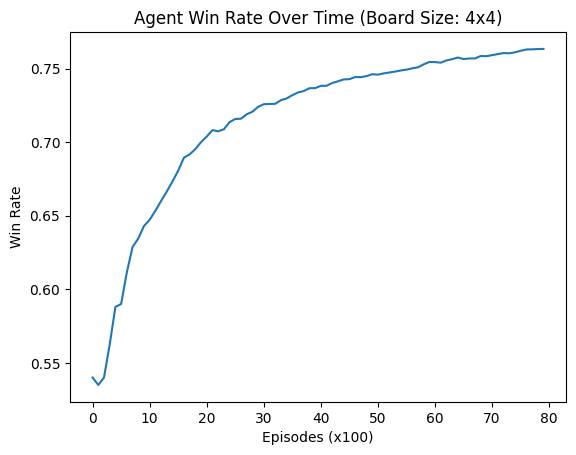

Episode 100: Win rate = 0.390
Episode 200: Win rate = 0.445
Episode 300: Win rate = 0.427
Episode 400: Win rate = 0.430
Episode 500: Win rate = 0.436
Episode 600: Win rate = 0.432
Episode 700: Win rate = 0.434
Episode 800: Win rate = 0.445
Episode 900: Win rate = 0.451
Episode 1000: Win rate = 0.448
Episode 1100: Win rate = 0.456
Episode 1200: Win rate = 0.457
Episode 1300: Win rate = 0.466
Episode 1400: Win rate = 0.472
Episode 1500: Win rate = 0.479
Episode 1600: Win rate = 0.486
Episode 1700: Win rate = 0.492
Episode 1800: Win rate = 0.499
Episode 1900: Win rate = 0.504
Episode 2000: Win rate = 0.510
Episode 2100: Win rate = 0.510
Episode 2200: Win rate = 0.515
Episode 2300: Win rate = 0.517
Episode 2400: Win rate = 0.519
Episode 2500: Win rate = 0.523
Episode 2600: Win rate = 0.521
Episode 2700: Win rate = 0.523
Episode 2800: Win rate = 0.529
Episode 2900: Win rate = 0.529
Episode 3000: Win rate = 0.532
Episode 3100: Win rate = 0.533
Episode 3200: Win rate = 0.540
Episode 3300: Win

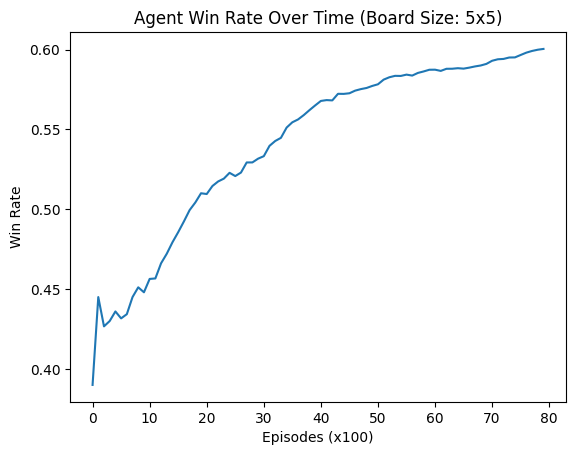

In [6]:
if __name__ == '__main__':
    # Train and plot for 4x4 board
    agent_4x4 = TicTacToeDPAgent(BOARD_SIZE_4x4)
    win_rates_4x4 = agent_4x4.train(8000)
    plot_win_rate(win_rates_4x4, BOARD_SIZE_4x4)

    # Train and plot for 5x5 board
    agent_5x5 = TicTacToeDPAgent(BOARD_SIZE_5x5)
    win_rates_5x5 = agent_5x5.train(8000)
    plot_win_rate(win_rates_5x5, BOARD_SIZE_5x5)